In [1]:
from pylabcontrol.core import Script
import numpy as np
import glob
import matplotlib.pyplot as plt

In [2]:
afm_scans=glob.glob(r'C:\Users\Characterization\B26_scanning_probe\data\*afmscan*')

C:\Users\Characterization\B26_scanning_probe\data\221216-20_15_54_afmscan


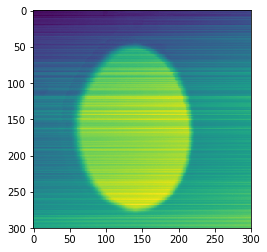

a: 9.659967 , 3.326301
b: 35.000000 , 20.000000


In [3]:
# conversion factor of nanomax
dim_cf = 0.266667 # um/V
con_z = 7.5*dim_cf
for d in afm_scans[::-1][:1]:
    print(r'{}'.format(d))
    try:
        data = Script.load_data(r'{}'.format(d))
        image = data['image_data']
        plt.imshow(image)
        plt.show()
        
        # write image data to text file
        #with open(r'{}\scandimensions.txt'.format(d), 'w') as f:
        np.savetxt(fname= r'{}\rawdata.txt'.format(d),X=image)
        
        extent = data['extent']
        point_a= [extent[0],extent[3]]
        point_b= [extent[1],extent[2]]
        print('a: %f , %f'%(point_a[0],point_a[1]))
        print('b: %f , %f'%(point_b[0],point_b[1]))
        
        # dimensions of scan in volts
        dimV_x = abs(point_a[0]-point_b[0])
        dimV_y = abs(point_a[1]-point_b[1])
        
        # dimenstions of scan in um
        dim_x = dimV_x*dim_cf
        dim_y = dimV_y*dim_cf
        
        # pixels
        px_x, px_y = np.shape(image)
        
        # write dimensions to text file
        with open(r'{}\scandimensions.txt'.format(d), 'w') as f:
            f.write('pixels: \n%i\n%i\ndimensions in [um]:\n%.4f\n%.4f\nconversion z [um/v]:\n%.4f'%(px_x,px_y,dim_x,dim_y,con_z))
               
    except:
        print("could not load data")

## Extracting sample height of calibration sample

In [36]:
h_line=image[150,:]

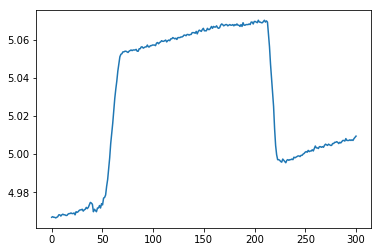

In [37]:
plt.plot(np.linspace(0,300,300),h_line)
plt.show()

In [38]:
image_rm_plane = np.loadtxt(r'C:\Users\Characterization\B26_scanning_probe\data\221216-20_15_54_afmscan\image_rm_plane.txt')

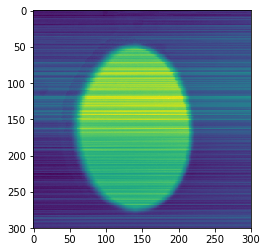

In [39]:
plt.imshow(image_rm_plane)
plt.show()

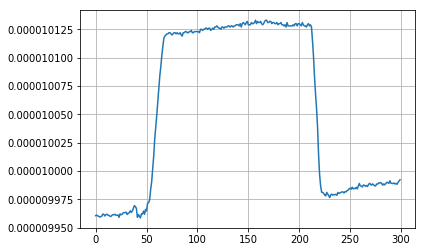

In [40]:
h_line = image_rm_plane[150]
plt.plot(h_line)
plt.grid()
plt.show()

In [41]:
mean_left = np.mean(h_line[:50])
mean_center = np.mean(h_line[70:200])
mean_right = np.mean(h_line[230:])

In [42]:
h_left = mean_center-mean_left
h_right = mean_center-mean_right
print(h_left)
print(h_right)

1.6482246153846196e-07
1.411556043956041e-07


### fitting a step function

In [43]:
from scipy.optimize import curve_fit
from scipy.signal import savgol_filter
def step(x,edge,height,offset,slope):
    # inside step
    y = np.heaviside(x-edge,0.5)*height+slope*x+offset
    return y    

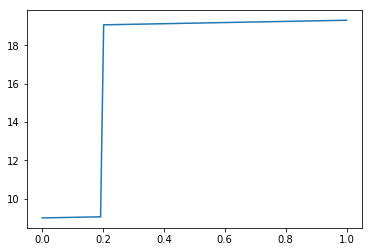

In [44]:
# testing step function
x = np.linspace(0,1,100)
y = step(x,0.2,10,9,0.3)
plt.plot(x,y)
plt.show()

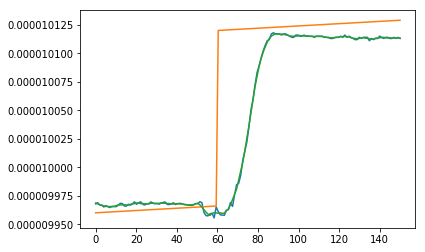

In [76]:
x = np.linspace(0,150,150)
y = step(x,edge=60,height=154e-9,offset=99.6e-7,slope=0.1e-9)
y_sm = savgol_filter(h_line[:150],5,1)
plt.plot(x,h_line[:150])
plt.plot(x,y)
plt.plot(x,y_sm)
plt.show()

[ 6.00000000e+01 -2.46994533e-08  9.84259894e-06  1.70071197e-09]


C:\Users\Characterization\B26_scanning_probe\venv\lib\site-packages\scipy\optimize\minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


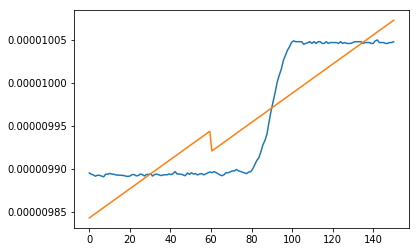

In [35]:
popt, pcov = curve_fit(step,np.linspace(0,150,150),h_line[:150],p0=(60,150e-9,99.6e-7,0.1e-9))
print(popt)
y_fit = step(x,*popt)
plt.plot(x,h_line[:150])
plt.plot(x,y_fit)
plt.show()

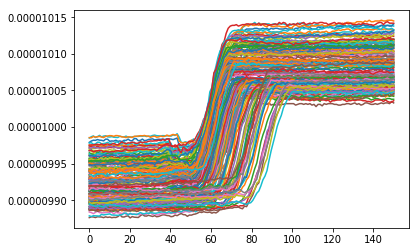

In [15]:
for i in range(100,250):
    h_line=image_rm_plane[i,:150]
    x = np.linspace(0,150,150)
    plt.plot(x,h_line)
plt.show()

In [88]:
x_cutoff=150
h_dist = []
for i in range(100,250):
    hline=image_rm_plane[i,:x_cutoff]
    x_left = hline[:20]
    x_right = hline[100:]
    height = np.abs(np.mean(x_left)-np.mean(x_right))
    h_dist.append(height)

average height: 155.306400 nm
std height: 5.428775 nm


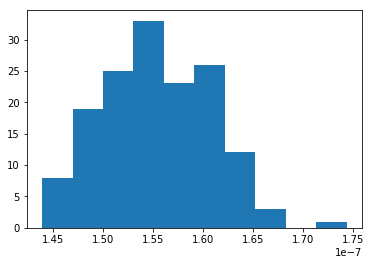

In [92]:
print('average height: %f nm' %(np.mean(h_dist)*1e9))
print('std height: %f nm' %(np.std(h_dist)*1e9))
plt.hist(h_dist)
plt.show()

### trying edge detection

In [18]:
from skimage import filters

In [19]:
edged_image = filters.roberts(image_rm_plane)

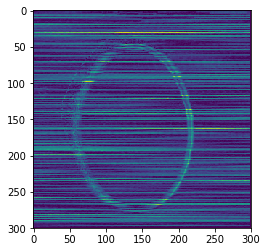

In [20]:
plt.imshow(edged_image)
plt.show()

## checking out poly remove

In [ ]:
image_rm_poly = np.loadtxt(r'C:\Users\Characterization\B26_scanning_probe\data\221216-20_15_54_afmscan\image_rm_poly.txt')

In [ ]:
plt.imshow(image_rm_poly)
plt.show()

In [ ]:
plt.plot(image_rm_poly[150])
plt.show()

In [82]:
np.mean([1,2,3])

2.0